In [1]:
import ROOT

Welcome to JupyROOT 6.20/06


In [2]:
file = ROOT.TFile( "optical_functions/optical_functions/2017/version4/120urad.root", "READ")

In [3]:
file.cd("XRPH_D6L5_B2")
file.ls()

TFile**		optical_functions/optical_functions/2017/version4/120urad.root	
 TFile*		optical_functions/optical_functions/2017/version4/120urad.root	
  TDirectoryFile*		XRPH_D6L5_B2	XRPH_D6L5_B2
   KEY: TGraph	g_D_x_vs_xi;1	;#xi;D_{x}   (cm)
   KEY: TGraph	g_D_x_vs_xi_check;1	;#xi;D_{x}   (cm)
   KEY: TGraph	g_D_y_vs_xi;1	;#xi;D_{y}   (cm)
   KEY: TGraph	g_E_14_vs_xi;1	;#xi;E_{14}
   KEY: TGraph	g_E_24_vs_xi;1	;#xi;E_{24}
   KEY: TGraph	g_E_32_vs_xi;1	;#xi;E_{32}
   KEY: TGraph	g_E_42_vs_xi;1	;#xi;E_{42}
   KEY: TGraph	g_L_x_vs_xi;1	;#xi;L_{x}   (cm)
   KEY: TGraph	g_L_y_vs_xi;1	;#xi;L_{y}   (cm)
   KEY: TGraph	g_Lp_x_vs_xi;1	;#xi;dL_{x}/ds
   KEY: TGraph	g_Lp_y_vs_xi;1	;#xi;dL_{y}/ds
   KEY: TGraph	g_v_x_vs_xi;1	;#xi;v_{x}
   KEY: TGraph	g_v_y_vs_xi;1	;#xi;v_{x}
   KEY: TGraph	g_vp_x_vs_xi;1	;#xi;dv_{x}/ds   (cm^{-1})
   KEY: TGraph	g_vp_y_vs_xi;1	;#xi;dv_{y}/ds   (cm^{-1})
   KEY: TGraph	g_x_D_vs_xi;1	;#xi;x_{D}   (cm)
   KEY: TGraph	g_x_D_vs_xi_check;1	;#xi;x_{D}   (cm)
   KEY: TGraph	g

In [4]:
#    cms.PSet( rpId = cms.uint32(0x76100000), dirName = cms.string("XRPH_C6L5_B2"), z = cms.double(-20382.6) ),  # RP 002, strip
#    cms.PSet( rpId = cms.uint32(0x76180000), dirName = cms.string("XRPH_D6L5_B2"), z = cms.double(-21255.1) ),  # RP 003, strip
#    cms.PSet( rpId = cms.uint32(0x77100000), dirName = cms.string("XRPH_C6R5_B1"), z = cms.double(+20382.6) ),  # RP 102, strip
#    cms.PSet( rpId = cms.uint32(0x77180000), dirName = cms.string("XRPH_D6R5_B1"), z = cms.double(+21255.1) ),  # RP 103, strip
#
#    cms.PSet( rpId = cms.uint32(0x76180000), dirName = cms.string("XRPH_D6L5_B2"), z = cms.double(-21255.1) ),  # RP 003, strip
#    cms.PSet( rpId = cms.uint32(2054160384), dirName = cms.string("XRPH_E6L5_B2"), z = cms.double(-21570.0) ),  # RP 016, diamond
#    cms.PSet( rpId = cms.uint32(2023227392), dirName = cms.string("XRPH_B6L5_B2"), z = cms.double(-21955.0) ),  # RP 023, pixel
#
#    cms.PSet( rpId = cms.uint32(0x77180000), dirName = cms.string("XRPH_D6R5_B1"), z = cms.double(+21255.1) ),  # RP 103, strip
#    cms.PSet( rpId = cms.uint32(2070937600), dirName = cms.string("XRPH_E6R5_B1"), z = cms.double(+21570.0) ),  # RP 116, diamond
#    cms.PSet( rpId = cms.uint32(2040004608), dirName = cms.string("XRPH_B6R5_B1"), z = cms.double(+21955.0) ),  # RP 123, pixel
#const uint32_t CTPPSDetId::startArmBit = 24, CTPPSDetId::maskArm = 0x1, CTPPSDetId::maxArm = 1,
#               CTPPSDetId::lowMaskArm = 0xFFFFFF;
#const uint32_t CTPPSDetId::startStationBit = 22, CTPPSDetId::maskStation = 0x3, CTPPSDetId::maxStation = 2,
#               CTPPSDetId::lowMaskStation = 0x3FFFFF;
#const uint32_t CTPPSDetId::startRPBit = 19, CTPPSDetId::maskRP = 0x7, CTPPSDetId::maxRP = 6,
#               CTPPSDetId::lowMaskRP = 0x7FFFF;

In [5]:
key = 0x7b700000
print ( hex( ( (key & ~0xFFFFFF) >> 24 ) & 0x1 ) )
print ( hex( ( (key & ~0x3FFFFF) >> 22 ) & 0x3 ) )
print ( hex( ( (key & ~0x7FFFF)  >> 19 ) & 0x7 ) )

0x1
0x1
0x6


In [6]:
RPInfo = {}
RPInfo[0x76180000] = { "dirName" : "XRPH_D6L5_B2", "zPos" : -21255.1 }
RPInfo[0x7a700000] = { "dirName" : "XRPH_E6L5_B2", "zPos" : -21570.0 }
RPInfo[0x78980000] = { "dirName" : "XRPH_B6L5_B2", "zPos" : -21955.0 }
RPInfo[0x77180000] = { "dirName" : "XRPH_D6R5_B1", "zPos" : +21255.1 }
RPInfo[0x7b700000] = { "dirName" : "XRPH_E6R5_B1", "zPos" : +21570.0 }
RPInfo[0x79980000] = { "dirName" : "XRPH_B6R5_B1", "zPos" : +21955.0 }

In [7]:
def rp_index( key ):
    index_ = ( ( ( (key & ~0xFFFFFF) >> 24 ) & 0x1 ), ( ( (key & ~0x3FFFFF) >> 22 ) & 0x3 ), ( ( (key & ~0x7FFFF)  >> 19 ) & 0x7 ) )
    return index_

In [8]:
RPInfoId = {}
for key in RPInfo:
    arm, station, rp = rp_index( key )
    rpid = 100*arm + 10*station + rp
    RPInfoId[rpid] = RPInfo[key]
RPInfoId

{3: {'dirName': 'XRPH_D6L5_B2', 'zPos': -21255.1},
 16: {'dirName': 'XRPH_E6L5_B2', 'zPos': -21570.0},
 23: {'dirName': 'XRPH_B6L5_B2', 'zPos': -21955.0},
 103: {'dirName': 'XRPH_D6R5_B1', 'zPos': 21255.1},
 116: {'dirName': 'XRPH_E6R5_B1', 'zPos': 21570.0},
 123: {'dirName': 'XRPH_B6R5_B1', 'zPos': 21955.0}}

In [9]:
OF_tags = (
    "v_x",
    "L_x",
    "E_14",
    "x_D",
    "vp_x",
    "Lp_x",
    "E_24",
    "xp_D",
    "E_32",
    "v_y",
    "L_y",
    "y_D",
    "E_42",
    "vp_y",
    "Lp_y",
    "yp_D"
    )

In [10]:
def optical_function( file, rpid, tag ):
    path_ = RPInfoId[rpid]["dirName"] + "/g_" + tag + "_vs_xi";
    print ( path_ )
    obj_ = file.Get( path_ )
    return obj_

XRPH_B6L5_B2/g_D_x_vs_xi
XRPH_B6L5_B2/g_D_x_vs_xi
0.10000000000000007 13.962760769367147 12.350175477250804


/cvmfs/sft.cern.ch/lcg/views/LCG_97apython3/x86_64-centos7-gcc8-opt/lib/ROOT.py:723: FutureWarning: buffer.SetSize(N) is deprecated and will disappear in a future version of ROOT. Instead, use buffer.reshape((N,))
  buf.SetSize(self.GetN())


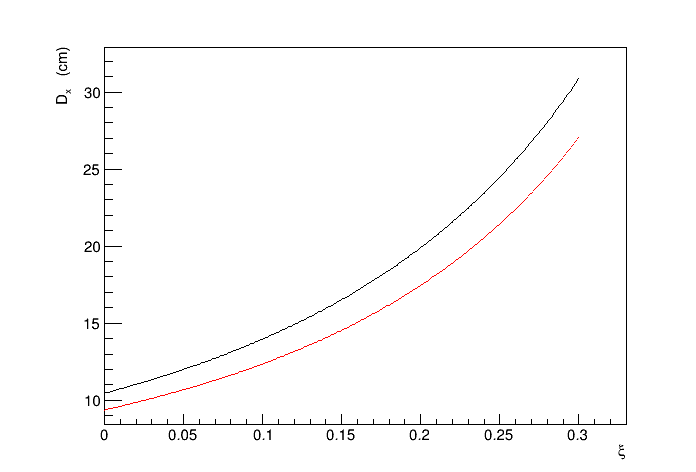

In [11]:
file2 = ROOT.TFile( "optical_functions/optical_functions/2017/version4/140urad.root", "READ")

gr = optical_function( file, 23, "D_x" )
canvas1 = ROOT.TCanvas("canvas1")
canvas1.SetLeftMargin(0.15)
gr.Draw()
gr2 = optical_function( file2, 23, "D_x" )
gr2.SetLineColor( 2 )
gr2.Draw("SAME")
canvas1.Draw()

import numpy as np
x = gr.GetX()
y1 = gr.GetY()
y2 = gr2.GetY()
X = np.array( list(x) )
Y1 = np.array( list(y1) )
Y2 = np.array( list(y2) )
idx = np.argmax( X >= 0.1 ) 
print( X[idx], Y1[idx], Y2[idx] )

XRPH_B6L5_B2/g_D_x_vs_xi
XRPH_B6R5_B1/g_D_x_vs_xi
0.10000000000000007 13.962760769367147 9.387851965739547


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas1


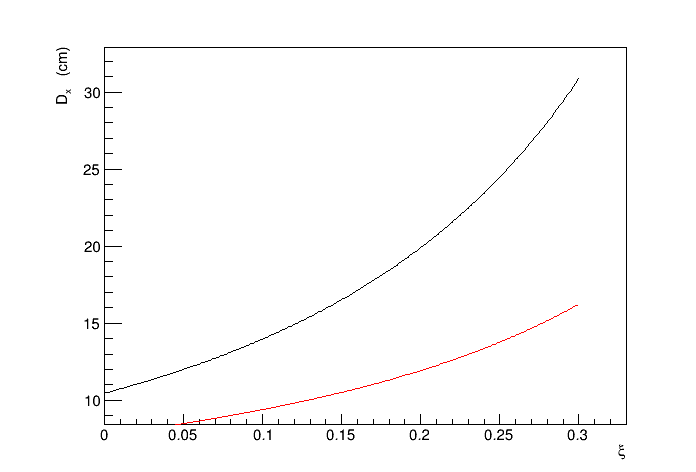

In [12]:
gr = optical_function( file, 23, "D_x" )
canvas1 = ROOT.TCanvas("canvas1")
canvas1.SetLeftMargin(0.15)
gr.Draw()
gr2 = optical_function( file, 123, "D_x" )
gr2.SetLineColor( 2 )
gr2.Draw("SAME")
canvas1.Draw()

import numpy as np
x = gr.GetX()
y1 = gr.GetY()
y2 = gr2.GetY()
X = np.array( list(x) )
Y1 = np.array( list(y1) )
Y2 = np.array( list(y2) )
idx = np.argmax( X >= 0.1 ) 
print( X[idx], Y1[idx], Y2[idx] )

XRPH_D6R5_B1/g_L_x_vs_xi


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas1


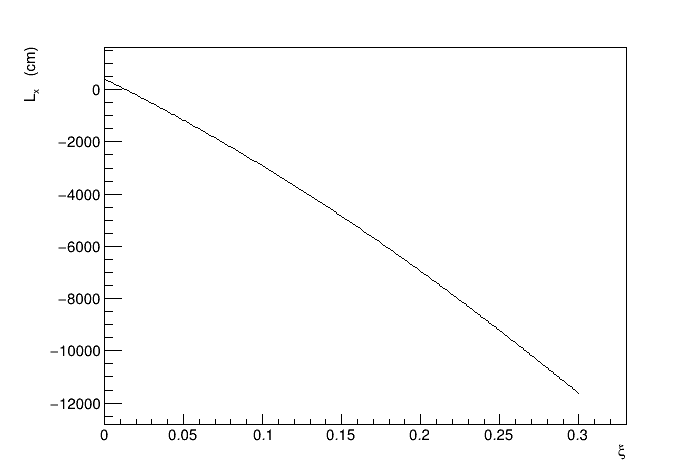

In [13]:
gr = optical_function( file, 103, "L_x" )
canvas1 = ROOT.TCanvas("canvas1")
canvas1.SetLeftMargin(0.15)
gr.Draw()
canvas1.Draw()

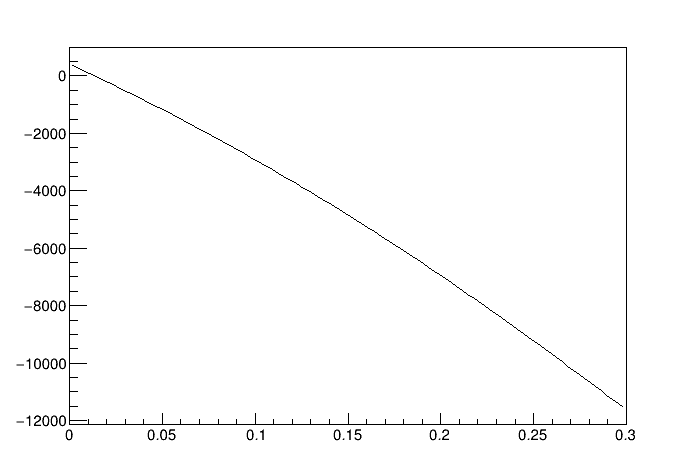

In [14]:
x_ = gr.GetX()
y_ = gr.GetY()
spl_ = ROOT.TSpline3( "", x_, y_, len( x_) )

canvas2 = ROOT.TCanvas("canvas2")
spl_.Draw()
canvas2.Draw()

In [15]:
import ROOT
import numpy as np

class SimpleLHCPropagator:
    def __init__( self, files, verbose=False ):
        
        if not isinstance( files, dict ):
            raise RuntimeError( "Provide file paths indexed by crossing angle value: { XANGLE : PATH }." )
            
        self.files_ = files
        self.verbose_ = verbose
        
        self.open_root_files_ = {}
        
        RPInfo_ = {}
        RPInfo_[0x76180000] = { "dirName" : "XRPH_D6L5_B2", "zPos" : -21255.1 }
        RPInfo_[0x7a700000] = { "dirName" : "XRPH_E6L5_B2", "zPos" : -21570.0 }
        RPInfo_[0x78980000] = { "dirName" : "XRPH_B6L5_B2", "zPos" : -21955.0 }
        RPInfo_[0x77180000] = { "dirName" : "XRPH_D6R5_B1", "zPos" : +21255.1 }
        RPInfo_[0x7b700000] = { "dirName" : "XRPH_E6R5_B1", "zPos" : +21570.0 }
        RPInfo_[0x79980000] = { "dirName" : "XRPH_B6R5_B1", "zPos" : +21955.0 }

        self.RPInfoId_ = {}
        for key in RPInfo_:
            arm, station, rp = self.rp_index( key )
            rpid = 100*arm + 10*station + rp
            self.RPInfoId_[rpid] = RPInfo_[key]
            
        self.OF_tags_ = ( "v_x",
                         "L_x",
                         "E_14",
                         "x_D",
                         "vp_x",
                         "Lp_x",
                         "E_24",
                         "xp_D",
                         "E_32",
                         "v_y",
                         "L_y",
                         "y_D",
                         "E_42",
                         "vp_y",
                         "Lp_y",
                         "yp_D"
                         )
        self.OF_tags_main_ = ( "x_D", "v_x", "L_x", "y_D", "v_y", "L_y" )

        # Map of files per crossing angle
        self.principal_xangles_ = None
        self.optical_functions_ = {}
        if isinstance(self.files_, dict):
            self.principal_xangles_ = list( self.files_.keys() )
            for xangle in self.principal_xangles_:
                print ( "Accessing optical functions for crossing angle {}".format( xangle ) )
                self.optical_functions_[ xangle ] = {}
                path_ = self.files_[ xangle ]
                for rpid in self.RPInfoId_:
                    self.optical_functions_[ xangle ][ rpid ] = {}
                    for tag in self.OF_tags_main_:
                        gr_ = self.get_function( xangle, rpid, tag )
                        x_ = gr_.GetX()
                        y_ = gr_.GetY()
                        spl_ = ROOT.TSpline3( "{}_{}_{}".format( str(xangle), str(rpid), tag ), x_, y_, len( x_) )
                        self.optical_functions_[ xangle ][ rpid ][ tag ] = spl_
                        
        print ( self.optical_functions_ )
        print ( self.open_root_files_ )
        for file_ in self.open_root_files_:
            self.open_root_files_[ file_ ].Close()

    def set_verbose( self, flag ):
        self.verbose_ = flag
    
    def rp_index( self, key ):
        index_ = ( ( ( (key & ~0xFFFFFF) >> 24 ) & 0x1 ), ( ( (key & ~0x3FFFFF) >> 22 ) & 0x3 ), ( ( (key & ~0x7FFFF)  >> 19 ) & 0x7 ) )
        return index_
    
    def get_function( self, xangle, rpid, tag ):
        path_ = self.RPInfoId_[rpid]["dirName"] + "/g_" + tag + "_vs_xi";
        print ( "Accessing {}".format( path_ ) )
        file_ = self.files_[ xangle ]
        rootFile_ = ROOT.TFile( file_ , "READ" )
        if not file_ in self.open_root_files_:
            self.open_root_files_[ file_ ] = rootFile_
        obj_ = rootFile_.Get( path_ )
        return obj_

    def of_tags( self):
        return self.OF_tags_main_
    
    def draw_function( self, xangle, rpid, tag):
        canvas_ = ROOT.TCanvas()
        function_ = self.optical_functions_[ xangle ][ rpid ][ tag ]
        function_.Draw()
        canvas_.Draw()
        return ( function_, canvas_ )
    
    def draw_function_vs_rpid( self, xangle, tag):
        canvas_ = ROOT.TCanvas()
        functions_ = []
        for rpid in self.RPInfoId_:
            functions_.append( self.optical_functions_[ xangle ][ rpid ][ tag ] )
            if len( functions_ ) == 1:
                functions_[-1].Draw()
            else:
                functions_[-1].Draw("SAME")
            
        canvas_.Draw()
        return ( functions_, canvas_ )

    def draw_function_vs_xangle( self, rpid, tag):
        canvas_ = ROOT.TCanvas()
        functions_ = []
        for xangle in self.principal_xangles_:
            functions_.append( self.optical_functions_[ xangle ][ rpid ][ tag ] )
            if len( functions_ ) == 1:
                functions_[-1].Draw()
            else:
                functions_[-1].Draw("SAME")
            
        canvas_.Draw()
        return ( functions_, canvas_ )

    def transport( self, rpid, xangle, kinematics ):
        
        x = kinematics[0]
        theta_x = kinematics[1]
        y = kinematics[2]
        theta_y = kinematics[3]
        xi = kinematics[4]
        
        interpolate_ = True
        if xangle in self.principal_xangles_:
            interpolate_ = False
        
        xangle1_ = None
        xangle2_ = None
        if interpolate_:
            arr_ = np.array( self.principal_xangles_ )
            if xangle < arr_[0]:
                xangle1_ = arr_[0]
                xangle2_ = arr_[1]
            elif xangle > arr_[-1]:
                xangle1_ = arr_[-2]
                xangle2_ = arr_[-1]
            else:
                xangle1_ = arr_[ arr_ <= xangle ][-1]
                xangle2_ = arr_[ arr_ >= xangle ][0]

        if self.verbose_: print ( "Principal crossing angle values:", self.principal_xangles_ )        
        if self.verbose_: print ( "Interpolate: {}".format( interpolate_ ) )   
        
        values_ = {}
        for tag in self.OF_tags_main_:
            if interpolate_: 
                function1_ = self.optical_functions_[ xangle1_ ][ rpid ][ tag ]
                function2_ = self.optical_functions_[ xangle2_ ][ rpid ][ tag ]
                val_ = function1_.Eval( xi ) + ( function2_.Eval( xi ) - function1_.Eval( xi ) ) * ( xangle - xangle1_ ) / ( xangle2_ - xangle1_ )
                values_[ tag ] = val_
            else:
                function_ = self.optical_functions_[ xangle ][ rpid ][ tag ]
                val_ = function_.Eval( xi )
                values_[ tag ] = val_
               
        if self.verbose_: print ( values_ )
        
        x_ = values_[ 'x_D' ] + values_[ 'v_x' ] * x + values_[ 'L_x' ] * theta_x
        y_ = values_[ 'y_D' ] + values_[ 'v_y' ] * y + values_[ 'L_y' ] * theta_y
        z_ = self.RPInfoId_[ rpid ][ "zPos" ]
        
        if self.verbose_: print ( "Transverse position in detector: ({},{})".format( x_, y_ ) )
        if self.verbose_: print ( "RP position: {}".format( z_ ) )
        
        return ( x_, y_, z_ )
           

In [16]:
files = {
    120: "optical_functions/optical_functions/2017/version4/120urad.root",
    130: "optical_functions/optical_functions/2017/version4/130urad.root",
    140: "optical_functions/optical_functions/2017/version4/140urad.root"
}

proton_transport = SimpleLHCPropagator( files )
    

Accessing optical functions for crossing angle 120
Accessing XRPH_D6L5_B2/g_x_D_vs_xi
Accessing XRPH_D6L5_B2/g_v_x_vs_xi
Accessing XRPH_D6L5_B2/g_L_x_vs_xi
Accessing XRPH_D6L5_B2/g_y_D_vs_xi
Accessing XRPH_D6L5_B2/g_v_y_vs_xi
Accessing XRPH_D6L5_B2/g_L_y_vs_xi
Accessing XRPH_E6L5_B2/g_x_D_vs_xi
Accessing XRPH_E6L5_B2/g_v_x_vs_xi
Accessing XRPH_E6L5_B2/g_L_x_vs_xi
Accessing XRPH_E6L5_B2/g_y_D_vs_xi
Accessing XRPH_E6L5_B2/g_v_y_vs_xi
Accessing XRPH_E6L5_B2/g_L_y_vs_xi
Accessing XRPH_B6L5_B2/g_x_D_vs_xi
Accessing XRPH_B6L5_B2/g_v_x_vs_xi
Accessing XRPH_B6L5_B2/g_L_x_vs_xi
Accessing XRPH_B6L5_B2/g_y_D_vs_xi
Accessing XRPH_B6L5_B2/g_v_y_vs_xi
Accessing XRPH_B6L5_B2/g_L_y_vs_xi
Accessing XRPH_D6R5_B1/g_x_D_vs_xi
Accessing XRPH_D6R5_B1/g_v_x_vs_xi
Accessing XRPH_D6R5_B1/g_L_x_vs_xi
Accessing XRPH_D6R5_B1/g_y_D_vs_xi
Accessing XRPH_D6R5_B1/g_v_y_vs_xi
Accessing XRPH_D6R5_B1/g_L_y_vs_xi
Accessing XRPH_E6R5_B1/g_x_D_vs_xi
Accessing XRPH_E6R5_B1/g_v_x_vs_xi
Accessing XRPH_E6R5_B1/g_L_x_vs_xi
Acce

{'optical_functions/optical_functions/2017/version4/120urad.root': <ROOT.TFile object ("optical_functions/optical_functions/2017/version4/120urad.root") at 0x67f0650>, 'optical_functions/optical_functions/2017/version4/130urad.root': <ROOT.TFile object ("optical_functions/optical_functions/2017/version4/130urad.root") at 0x67f17a0>, 'optical_functions/optical_functions/2017/version4/140urad.root': <ROOT.TFile object ("optical_functions/optical_functions/2017/version4/140urad.root") at 0x69090b0>}


In [17]:
proton_transport.of_tags()

('x_D', 'v_x', 'L_x', 'y_D', 'v_y', 'L_y')

([<ROOT.TSpline3 object ("Spline3") at 0x685bed0>,
  <ROOT.TSpline3 object ("Spline3") at 0x68f1360>,
  <ROOT.TSpline3 object ("Spline3") at 0x69cf2d0>],
 <ROOT.TCanvas object ("c1") at 0x68a7160>)

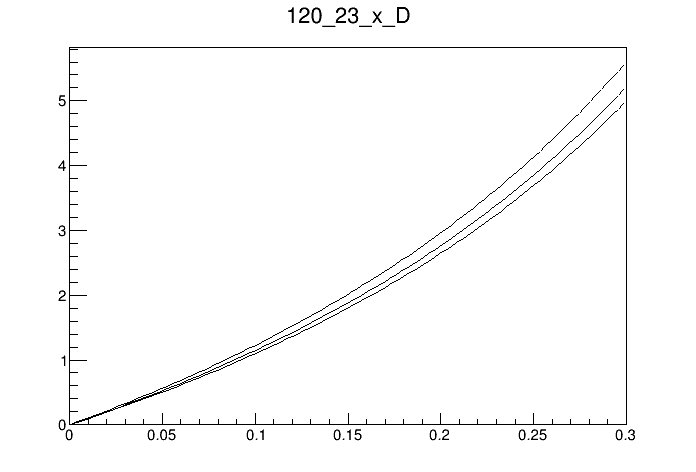

In [18]:
proton_transport.draw_function_vs_xangle( 23, "x_D" )

In [19]:
import numpy as np
arr = np.array( [120, 130, 140] )
x = 139.

x1 = None
x2 = None
if x < arr[0]:
    x1 = arr[0]
    x2 = arr[1]
elif x > arr[-1]:
    x1 = arr[-2]
    x2 = arr[-1]
else:
    x1 = arr[ arr <= x ][-1]
    x2 = arr[ arr >= x ][0]
    
print ( x1 )
print ( x2 )


130
140


In [20]:
proton_transport.set_verbose( True )
proton_transport.transport( 23, 120., (0., 0., 0., 0., 0.) )
proton_transport.transport( 123, 120., (0., 0., 0., 0., 0.) )

proton_transport.transport( 23, 120., (0., 0., 0., 0., 0.05) )
proton_transport.transport( 23, 130., (0., 0., 0., 0., 0.05) )
proton_transport.transport( 23, 140., (0., 0., 0., 0., 0.05) )
proton_transport.transport( 23, 155., (0., 0., 0., 0., 0.05) )
proton_transport.set_verbose( False )

Principal crossing angle values: [120, 130, 140]
Interpolate: False
{'x_D': 0.0, 'v_x': -4.1005100334350875, 'L_x': 267.70276078335354, 'y_D': 0.0, 'v_y': -3.9530199263385786, 'L_y': 990.8542361675684}
Transverse position in detector: (0.0,0.0)
RP position: -21955.0
Principal crossing angle values: [120, 130, 140]
Interpolate: False
{'x_D': 0.0, 'v_x': -4.061059372993941, 'L_x': 259.62082829523337, 'y_D': 0.0, 'v_y': -3.97842284712661, 'L_y': 989.1769864443919}
Transverse position in detector: (0.0,0.0)
RP position: 21955.0
Principal crossing angle values: [120, 130, 140]
Interpolate: False
{'x_D': 0.5629041130988695, 'v_x': -4.302739529591844, 'L_x': -1381.9138723270034, 'y_D': 0.0675, 'v_y': -4.644679025957877, 'L_y': -1431.572684928527}
Transverse position in detector: (0.5629041130988695,0.0675)
RP position: -21955.0
Principal crossing angle values: [120, 130, 140]
Interpolate: False
{'x_D': 0.526615143015765, 'v_x': -4.30271417310418, 'L_x': -1381.319988629127, 'y_D': 0.0675, 'v_y

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

np.random.seed(42)

nevents = 100000
rpid = 123
xangle = 150.
sigma_theta = 60.e-06

xi = 0. + 0.20*np.random.rand( nevents )

x = y = 0
arr_theta = sigma_theta * np.random.randn( nevents, 2 )

data = np.c_[ ( np.ones( nevents ) * x ), arr_theta[:,0],
              ( np.ones( nevents ) * y ), arr_theta[:,1], xi ]

proton_transport.transport( rpid, xangle, data[0] )

f_ = lambda kinematics: proton_transport.transport( rpid, xangle, kinematics )

positions_rp = np.apply_along_axis( f_, 1, data )

fig = plt.figure( figsize=(10,10) )
counts, xedges, yedges, im = plt.hist2d( positions_rp[:,0]*1e1, positions_rp[:,1]*1e1, bins=(100,100), range=( (0.,5.), (-3.,3.) ), norm=LogNorm(), cmap='viridis' )
#plt.plot( positions_rp[:,0]*1e1, positions_rp[:,1]*1e1, 'ko' )

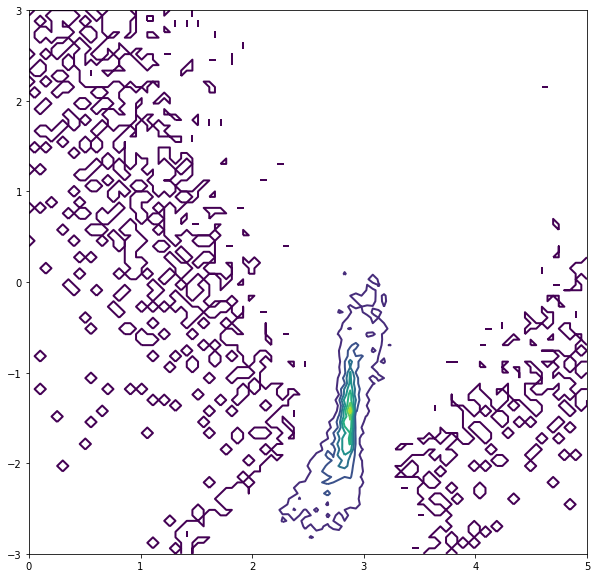

In [22]:
fig = plt.figure( figsize=(10,10) )
plt.contour(counts,extent=[xedges.min(),xedges.max(),yedges.min(),yedges.max()],linewidths=2)

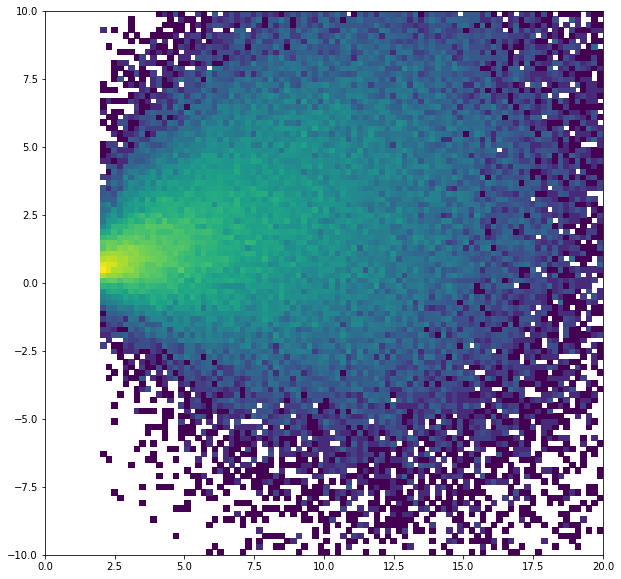

In [23]:
x_min = 0.2
msk = positions_rp[:,0] >= x_min
positions_rp_xcut = positions_rp[ msk, : ]

fig = plt.figure( figsize=(10,10) )
counts, xedges, yedges, im = plt.hist2d( positions_rp_xcut[:,0]*1e1, positions_rp_xcut[:,1]*1e1, bins=(100,100), range=( (0.,20.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )

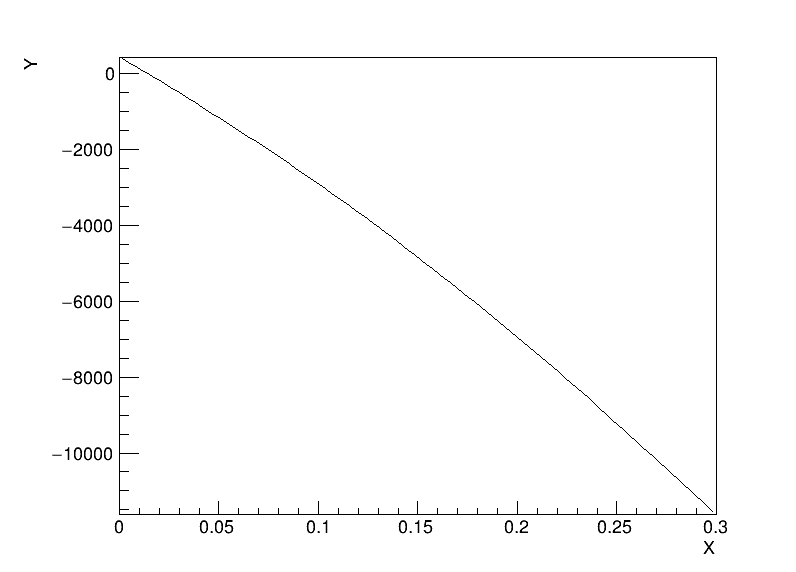

In [24]:
w = 800
h = 600
canvas_ = ROOT.TCanvas("canvas_","",w,h)
canvas_.SetLeftMargin( 0.15 )
x1 = spl_.GetXmin()
y1 = spl_.Eval( spl_.GetXmin() )
x2 = spl_.GetXmax()
y2 = spl_.Eval( spl_.GetXmax() )

frame = canvas_.DrawFrame( x1, np.min( (y1,y2) ), x2, np.max( (y1,y2) ) )
frame.GetXaxis().SetTitle( "X" )
frame.GetYaxis().SetTitle( "Y" )
spl_.Draw( "SAME" )
canvas_.Draw()